<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 193.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 166.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 135.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 125.6 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Identify missing values
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values)

# Drop rows with missing values in critical columns
df_cleaned = df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'])

# Alternatively, you can fill missing values with a placeholder or mode
# df['Employment'].fillna('Unknown', inplace=True)
# df['JobSat'].fillna(df['JobSat'].mode()[0], inplace=True)
# df['RemoteWork'].fillna('Unknown', inplace=True)

# Verify the handling of missing values
missing_values_after = df_cleaned[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values_after)

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


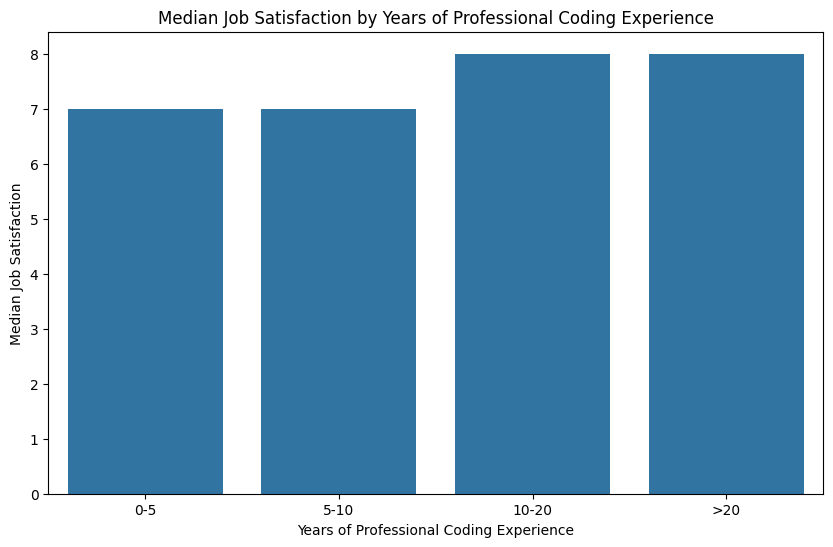

In [4]:
## Write your code here
# Convert YearsCodePro to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create experience ranges
experience_bins = [0, 5, 10, 20, float('inf')]
experience_labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=experience_bins, labels=experience_labels, include_lowest=True)

# Calculate median JobSat for each experience range
median_jobsat = df.groupby('ExperienceRange', observed=False)['JobSat'].median().reset_index()

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.barplot(data=median_jobsat, x='ExperienceRange', y='JobSat')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


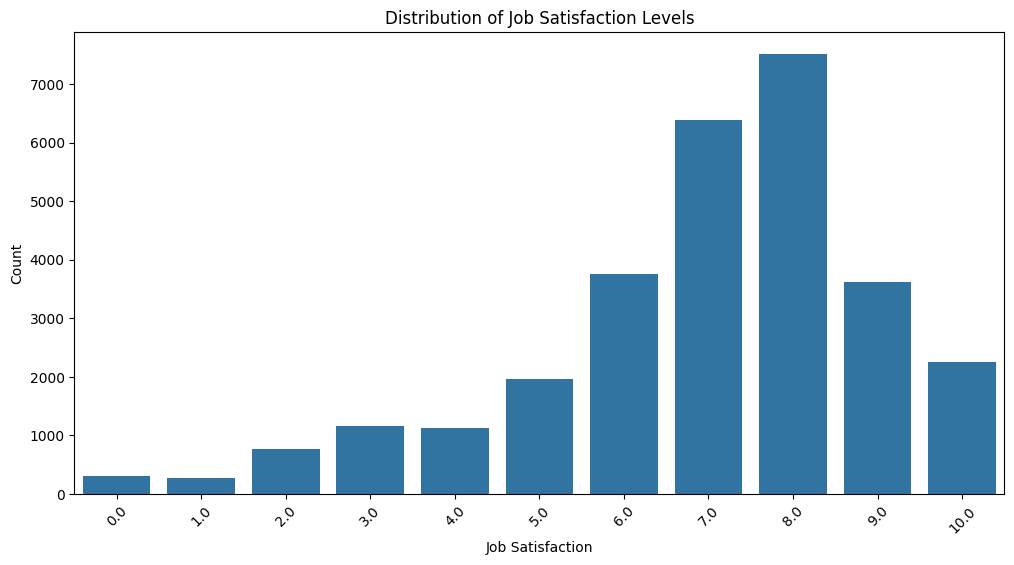

In [5]:
## Write your code here
# Plot the distribution of JobSat values using a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='JobSat')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction Levels')
plt.xticks(rotation=45)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


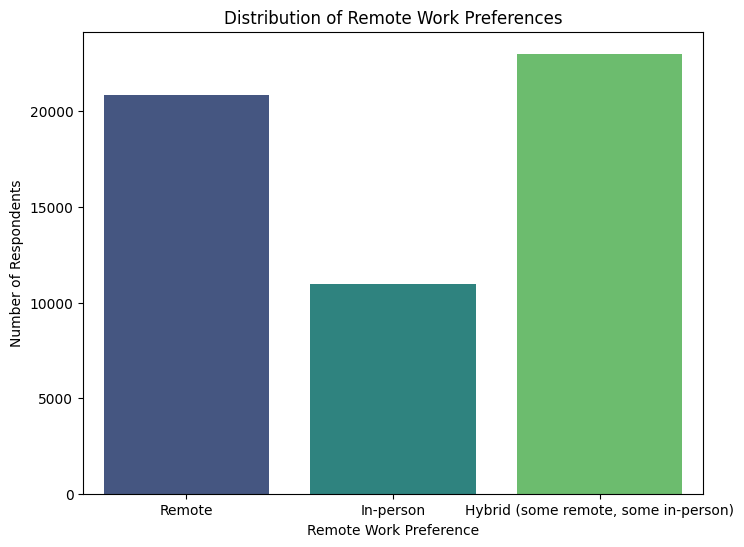


Cross-tabulation of Remote Work by Employment:
 RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17281   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, but looking fo...                                     2   
Student, full-time;Not employed

In [6]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for RemoteWork distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='RemoteWork', data=df, hue='RemoteWork', palette="viridis", legend=False)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.show()

# Cross-tabulation of RemoteWork by Employment
employment_remote_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'])
print("\nCross-tabulation of Remote Work by Employment:\n", employment_remote_crosstab)

# Cross-tabulation of RemoteWork by DevType (Job Role)

# Fill missing values in DevType with 'Unknown' (corrected for chained assignment warning)
df['DevType'] = df['DevType'].fillna('Unknown')

# Function to safely check for substring in potentially NaN values
def safe_contains(series, substring):
    return series.astype(str).str.contains(substring, case=False, na=False)

# Create a crosstab for each DevType
dev_types = ['Developer', 'Engineer', 'Data scientist', 'Data analyst', 'Student', 'Academic', 'Educator', 'Scientist', 'Other']
for dev_type in dev_types:
    df[dev_type] = safe_contains(df['DevType'], dev_type)

devtype_remote_crosstab = pd.DataFrame()
for dev_type in dev_types:
    devtype_remote_crosstab[dev_type] = df.groupby(dev_type)['RemoteWork'].value_counts(normalize=True).unstack().get('Yes', 0)

print("\nCross-tabulation of Remote Work by DevType (Percentage of 'Yes' for Remote Work):\n", devtype_remote_crosstab)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_299/240924241.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_counts.head(10), x='Count', y='Programming Language', palette='viridis')


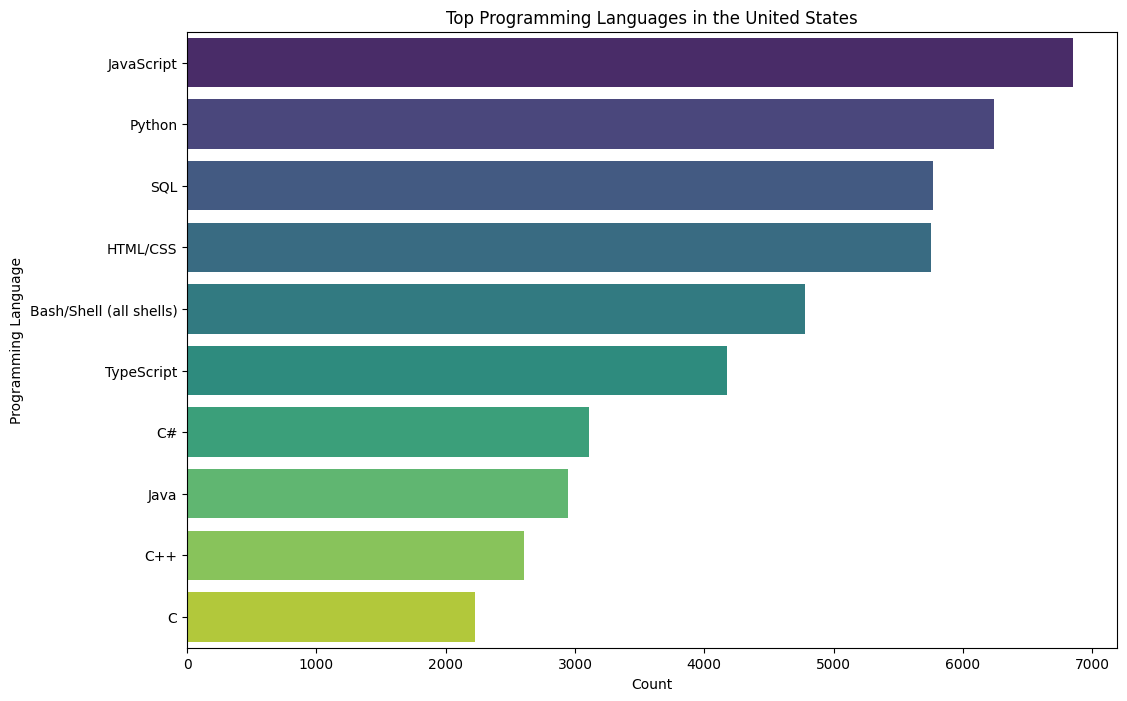

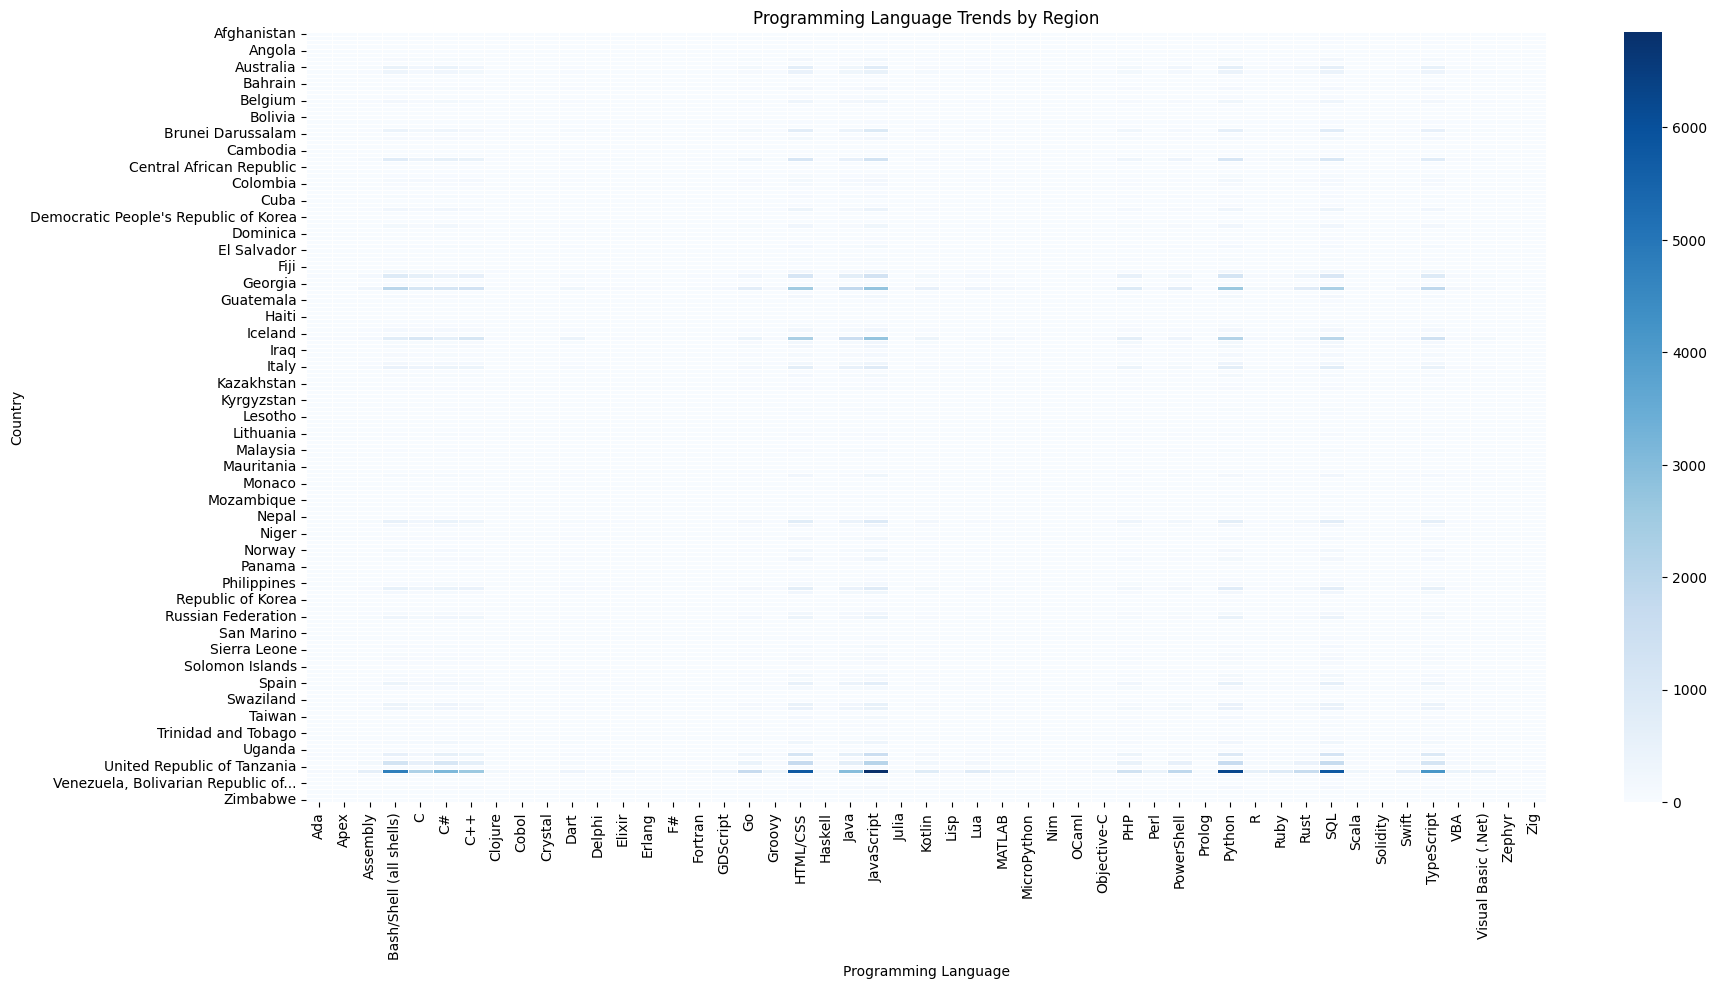

In [7]:
## Write your code here
# Explode the LanguageHaveWorkedWith column to analyze individual languages
df_exploded = df.assign(LanguageHaveWorkedWith=df['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Filter data by a specific country (e.g., 'United States of America')
country_data = df_exploded[df_exploded['Country'] == 'United States of America']

# Count the occurrences of each programming language
language_counts = country_data['LanguageHaveWorkedWith'].value_counts().reset_index()
language_counts.columns = ['Programming Language', 'Count']

# Plot the top programming languages in the specified country
plt.figure(figsize=(12, 8))
sns.barplot(data=language_counts.head(10), x='Count', y='Programming Language', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.title('Top Programming Languages in the United States')
plt.show()

# Optionally, visualize trends for multiple regions using a heatmap
# Create a pivot table with countries as rows and programming languages as columns
language_region_pivot = df_exploded.pivot_table(index='Country', columns='LanguageHaveWorkedWith', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(language_region_pivot, cmap='Blues', linewidths=.5)
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.title('Programming Language Trends by Region')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


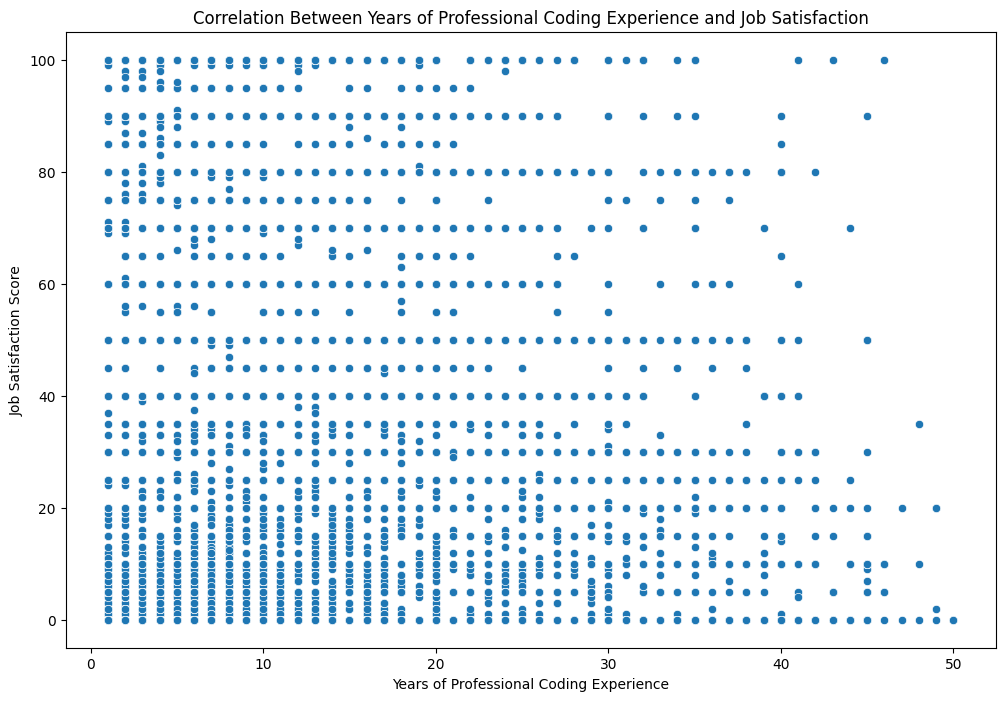

In [8]:
## Write your code here
# Convert YearsCodePro to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Plot the scatter plot for YearsCodePro and JobSatPoints_1
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.title('Correlation Between Years of Professional Coding Experience and Job Satisfaction')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                            0.590630   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                   0.673803   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                0.707784   
Primary/elementary school                                      0.139616   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                 0.697980   
Secondary school (e.g. American high school, Ge...             0.252028   
Some college/university study without earning a...             0.467782   
Something else                                                 0.404506   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

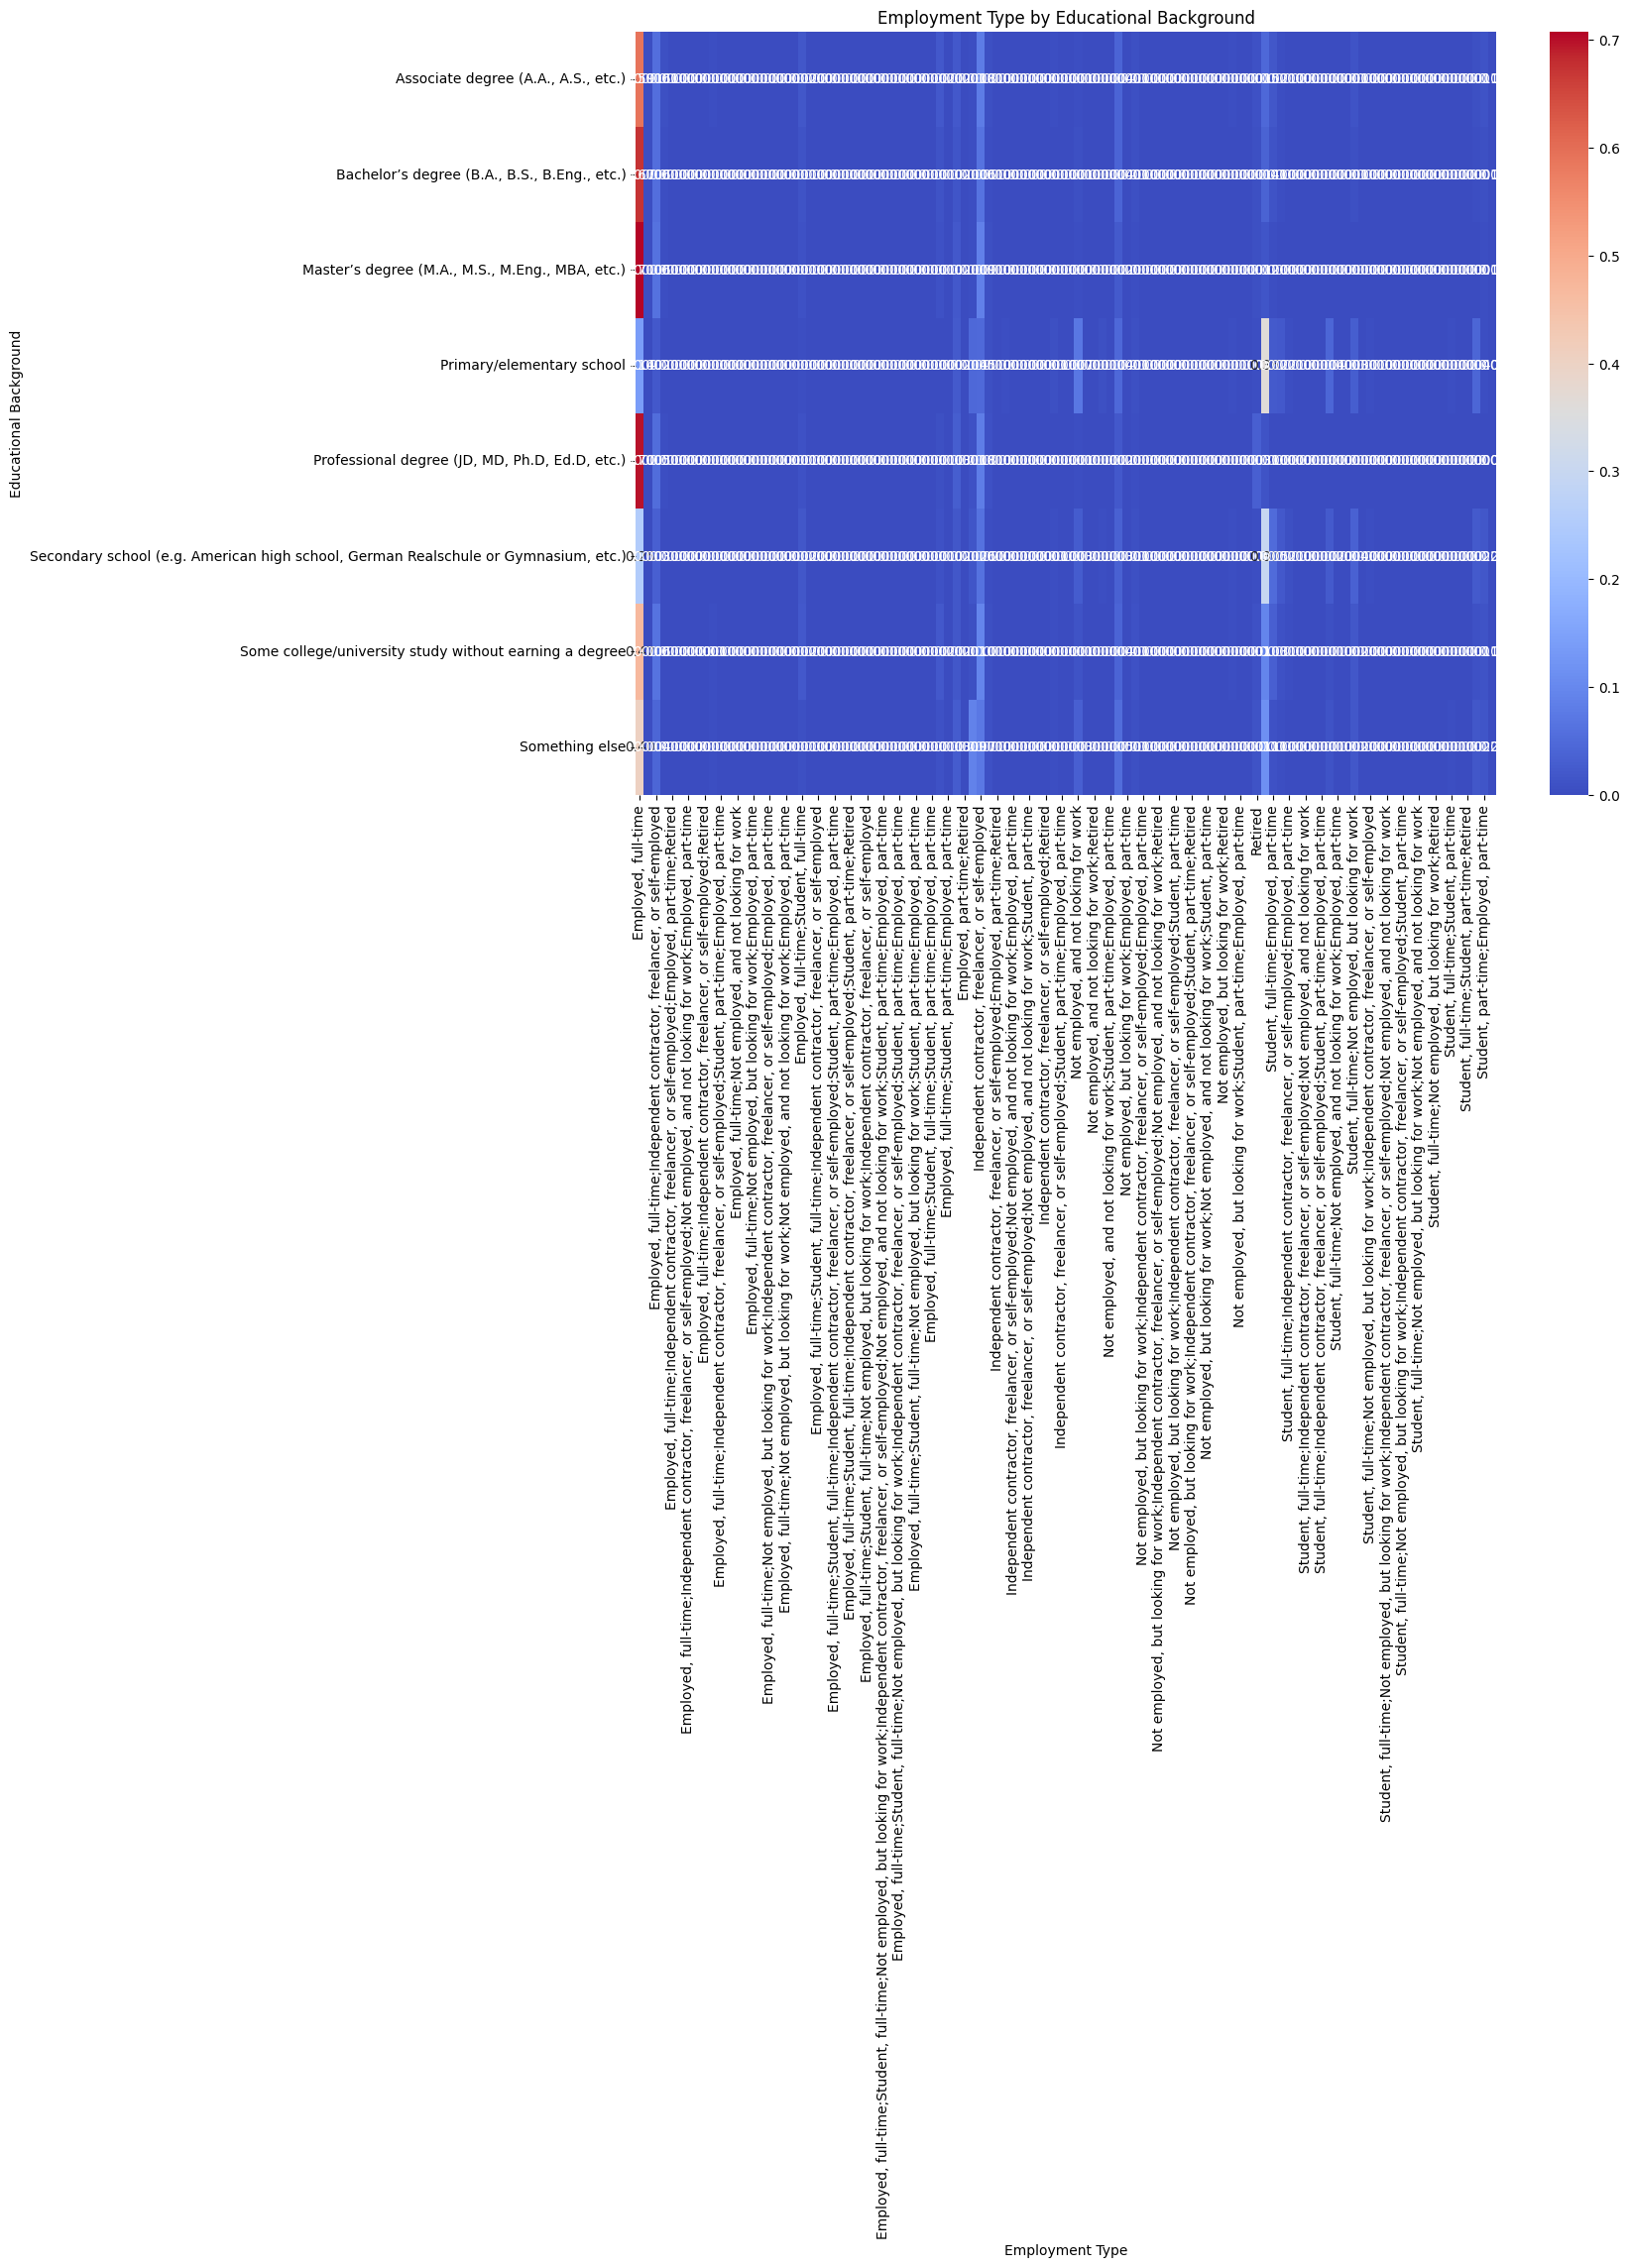

In [9]:
## Write your code here
# Cross-tabulate educational background and employment type
education_employment_crosstab = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')
print(education_employment_crosstab)

# Visualize the cross-tabulation with a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(education_employment_crosstab, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Employment Type')
plt.ylabel('Educational Background')
plt.title('Employment Type by Educational Background')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [10]:
## Write your code here
# Save the cleaned and analyzed DataFrame to a new CSV file
df.to_csv('cleaned_survey_data.csv', index=False)

# If you also want to save the exploded dataframe
#df_exploded.to_csv('cleaned_survey_data_exploded.csv', index = False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
